<a href="https://colab.research.google.com/github/PBMG14/Python_works/blob/main/Work6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import sqlite3
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

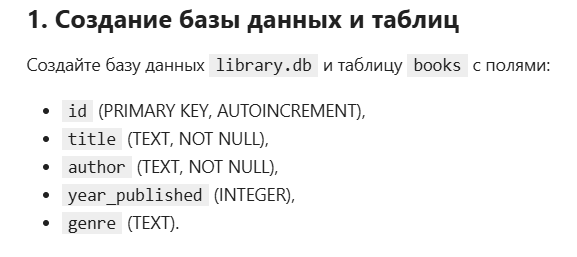

In [71]:
create_table_query = '''
CREATE TABLE IF NOT EXISTS books (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    title TEXT NOT NULL,
    author TEXT NOT NULL,
    year_published INTEGER,
    genre TEXT
);
'''
cursor.execute(create_table_query)
cursor.execute('''
SELECT name FROM sqlite_master WHERE type='table' AND name='books';
''')
result = cursor.fetchone()
if result:
    print("Таблица 'books' существует.")
else:
    print("Таблица 'books' не существует.")
connection.commit()

Таблица 'books' существует.


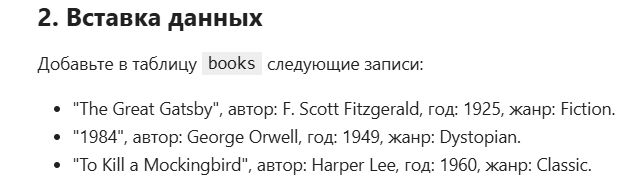

In [50]:
insert_query = '''
INSERT INTO books (title, author, year_published, genre)
VALUES (?, ?, ?, ?);
'''
book_data = [
    ('The Great Gatsby', 'F. Scott Fitzgerald', 1925,'Fiction'),
    ('1984', 'George Orwell', 1949,'Dystopian'),
    ('To Kill a Mokcingbird', 'Harper Lee', 1960,'Classic')
    ]
cursor.executemany(insert_query, book_data)
connection.commit()

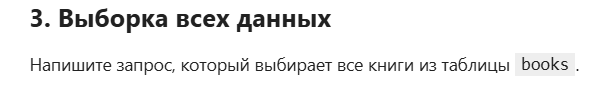

In [51]:
select_query = '''
SELECT * FROM books;
'''
cursor.execute(select_query)
rows = cursor.fetchall()
for row in rows:
    print(row)

(2, '1984', 'George Orwell', 1948, 'Dystopian')
(3, 'To Kill a Mokcingbird', 'Harper Lee', 1961, 'Classic')
(4, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(5, '1984', 'George Orwell', 1949, 'Dystopian')
(6, 'To Kill a Mokcingbird', 'Harper Lee', 1961, 'Classic')
(7, 'The Catcher in the Rye', 'J.D. Salinger', 1951, 'Classic')
(8, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(9, '1984', 'George Orwell', 1949, 'Dystopian')
(10, 'To Kill a Mokcingbird', 'Harper Lee', 1960, 'Classic')


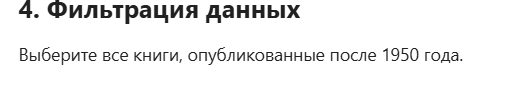

In [52]:
select_query_where = '''
SELECT * FROM books
WHERE year_published > 1950
'''
cursor.execute(select_query_where)
rows = cursor.fetchall()
for row in rows:
  print(row)

(3, 'To Kill a Mokcingbird', 'Harper Lee', 1961, 'Classic')
(6, 'To Kill a Mokcingbird', 'Harper Lee', 1961, 'Classic')
(7, 'The Catcher in the Rye', 'J.D. Salinger', 1951, 'Classic')
(10, 'To Kill a Mokcingbird', 'Harper Lee', 1960, 'Classic')


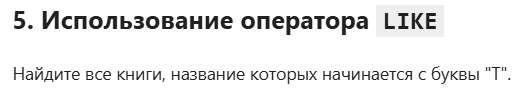

In [53]:
select_query_like = '''
SELECT * FROM books
WHERE title like 'T%'
'''
cursor.execute(select_query_like)
rows = cursor.fetchall()
for row in rows:
  print(row)

(3, 'To Kill a Mokcingbird', 'Harper Lee', 1961, 'Classic')
(4, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(6, 'To Kill a Mokcingbird', 'Harper Lee', 1961, 'Classic')
(7, 'The Catcher in the Rye', 'J.D. Salinger', 1951, 'Classic')
(8, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(10, 'To Kill a Mokcingbird', 'Harper Lee', 1960, 'Classic')


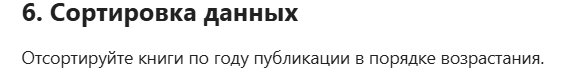

In [54]:
selecr_query_sorted = '''
SELECT * FROM books ORDER BY year_published
'''
cursor.execute(selecr_query_sorted)
rows = cursor.fetchall()
for row in rows:
  print(row)

(4, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(8, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(2, '1984', 'George Orwell', 1948, 'Dystopian')
(5, '1984', 'George Orwell', 1949, 'Dystopian')
(9, '1984', 'George Orwell', 1949, 'Dystopian')
(7, 'The Catcher in the Rye', 'J.D. Salinger', 1951, 'Classic')
(10, 'To Kill a Mokcingbird', 'Harper Lee', 1960, 'Classic')
(3, 'To Kill a Mokcingbird', 'Harper Lee', 1961, 'Classic')
(6, 'To Kill a Mokcingbird', 'Harper Lee', 1961, 'Classic')


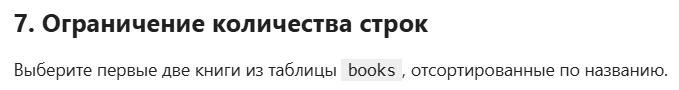

In [55]:
select_query_two = '''
SELECT * FROM books ORDER BY title LIMIT 2
'''
cursor.execute(select_query_two)
rows = cursor.fetchall()
for row in rows:
  print(row)

(2, '1984', 'George Orwell', 1948, 'Dystopian')
(5, '1984', 'George Orwell', 1949, 'Dystopian')


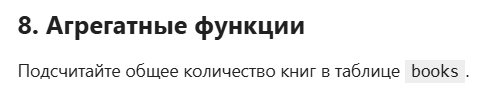

In [56]:
count_query = '''
SELECT COUNT(*) FROM books
'''
cursor.execute(count_query)
rows = cursor.fetchall()
print(rows[0][0])

9


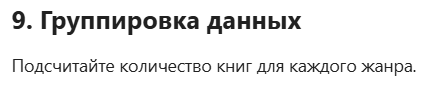

In [57]:
count_query_genre = '''
SELECT COUNT(*) FROM books GROUP BY genre
'''
cursor.execute(count_query_genre)
rows = cursor.fetchall()
for row in rows:
  print(row[0])

4
3
2


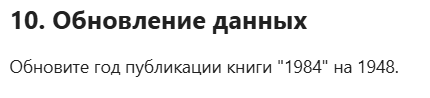

In [58]:
change_query = '''
UPDATE books
SET year_published = 1948
WHERE year_published = 1949
'''
cursor.execute(change_query)
cursor.execute(select_query)
rows = cursor.fetchall()
for row in rows:
  print(row)

(2, '1984', 'George Orwell', 1948, 'Dystopian')
(3, 'To Kill a Mokcingbird', 'Harper Lee', 1961, 'Classic')
(4, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(5, '1984', 'George Orwell', 1948, 'Dystopian')
(6, 'To Kill a Mokcingbird', 'Harper Lee', 1961, 'Classic')
(7, 'The Catcher in the Rye', 'J.D. Salinger', 1951, 'Classic')
(8, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(9, '1984', 'George Orwell', 1948, 'Dystopian')
(10, 'To Kill a Mokcingbird', 'Harper Lee', 1960, 'Classic')


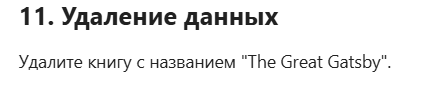

In [59]:
delete_query = '''
DELETE FROM books
WHERE title = 'The Great Gatsby'
'''
cursor.execute(delete_query)
cursor.execute(select_query)
rows = cursor.fetchall()
for row in rows:
  print(row)

(2, '1984', 'George Orwell', 1948, 'Dystopian')
(3, 'To Kill a Mokcingbird', 'Harper Lee', 1961, 'Classic')
(5, '1984', 'George Orwell', 1948, 'Dystopian')
(6, 'To Kill a Mokcingbird', 'Harper Lee', 1961, 'Classic')
(7, 'The Catcher in the Rye', 'J.D. Salinger', 1951, 'Classic')
(9, '1984', 'George Orwell', 1948, 'Dystopian')
(10, 'To Kill a Mokcingbird', 'Harper Lee', 1960, 'Classic')


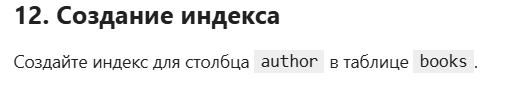

In [60]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

query = """
CREATE INDEX IF NOT EXISTS idx_books_author
ON books (author);
"""

cursor.execute(query)

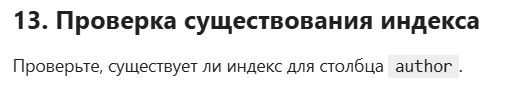

In [61]:

connection = sqlite3.connect('library.db')
cursor = connection.cursor()

cursor.execute('''
SELECT name FROM sqlite_master WHERE type='index' AND name='idx_books_author';
''')

result = cursor.fetchone()

if result:
    print(f"Индекс '{result[0]}' существует.")
else:
    print("Индекс не существует.")

Индекс 'idx_books_author' существует.


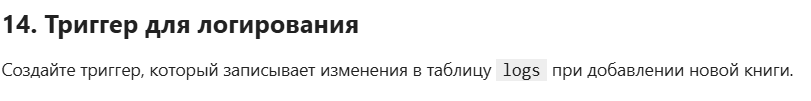

In [62]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS logs (
    book_id INTEGER PRIMARY KEY,
    action TEXT NOT NULL
);
''')
cursor.execute('''
CREATE TRIGGER IF NOT EXISTS log_user_changes
AFTER INSERT ON books
FOR EACH ROW
BEGIN
    INSERT INTO book_logs (book_id, action)
    VALUES (NEW.id, 'INSERT');
END;
''')
connection.commit()

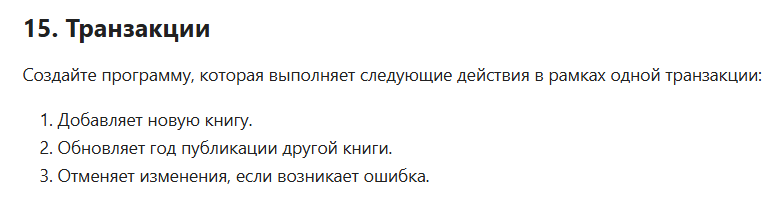

In [64]:
cursor.execute("INSERT INTO books (title, author, year_published, genre) VALUES (?, ?, ?, ?)",
  ('The Catcher in the Rye', 'J.D. Salinger', 1951, 'Classic'))
cursor.execute("UPDATE books SET year_published = ? WHERE title = ?",
                  (1961, 'To Kill a Mokcingbird'))
connection.commit()
print("успешно завершено")
cursor.execute("SELECT * FROM books")
for row in cursor.fetchall():
    print(row)

успешно завершено
(2, '1984', 'George Orwell', 1948, 'Dystopian')
(3, 'To Kill a Mokcingbird', 'Harper Lee', 1961, 'Classic')
(4, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(5, '1984', 'George Orwell', 1949, 'Dystopian')
(6, 'To Kill a Mokcingbird', 'Harper Lee', 1961, 'Classic')
(7, 'The Catcher in the Rye', 'J.D. Salinger', 1951, 'Classic')
(8, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(9, '1984', 'George Orwell', 1949, 'Dystopian')
(10, 'To Kill a Mokcingbird', 'Harper Lee', 1961, 'Classic')
(11, 'The Catcher in the Rye', 'J.D. Salinger', 1951, 'Classic')


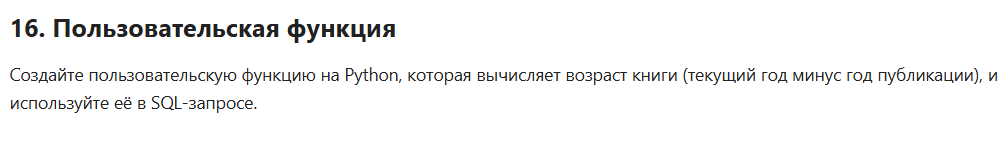

In [65]:
connection.create_function("book_age", 1, lambda year: datetime.now().year - year)
cursor = connection.cursor()
cursor.execute('''
SELECT title, year_published, book_age(year_published) AS age
FROM books;
''')
rows = cursor.fetchall()
for row in rows:
    print(row)

('1984', 1948, 77)
('To Kill a Mokcingbird', 1961, 64)
('The Great Gatsby', 1925, 100)
('1984', 1949, 76)
('To Kill a Mokcingbird', 1961, 64)
('The Catcher in the Rye', 1951, 74)
('The Great Gatsby', 1925, 100)
('1984', 1949, 76)
('To Kill a Mokcingbird', 1961, 64)
('The Catcher in the Rye', 1951, 74)


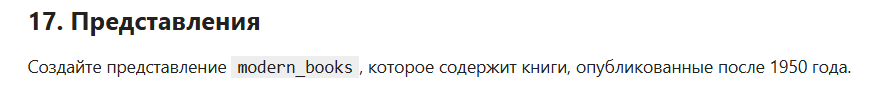

In [66]:
cursor.execute('''
CREATE VIEW IF NOT EXISTS modern_books AS
SELECT *
FROM books
WHERE year_published > 1950;
''')
cursor.execute('SELECT * FROM modern_books;')
modern_books = cursor.fetchall()
for book in modern_books:
    print(book)

connection.commit()

(3, 'To Kill a Mokcingbird', 'Harper Lee', 1961, 'Classic')
(6, 'To Kill a Mokcingbird', 'Harper Lee', 1961, 'Classic')
(7, 'The Catcher in the Rye', 'J.D. Salinger', 1951, 'Classic')
(10, 'To Kill a Mokcingbird', 'Harper Lee', 1961, 'Classic')
(11, 'The Catcher in the Rye', 'J.D. Salinger', 1951, 'Classic')


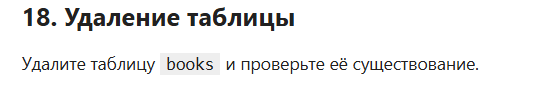

In [68]:
cursor.execute('DROP TABLE IF EXISTS books;')
cursor.execute('''
SELECT name FROM sqlite_master WHERE type='table' AND name='books';
''')
result = cursor.fetchone()

if result:
    print("Таблица 'books' существует.")
else:
    print("Таблица 'books' не существует.")

connection.commit()

Таблица 'books' не существует.


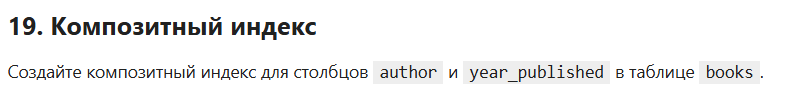

In [75]:
cursor.execute('''
CREATE INDEX IF NOT EXISTS idx_author_year
ON books (author, year_published);
''')
cursor.execute('''
SELECT name FROM sqlite_master WHERE type='index' AND name='idx_author_year';
''')
result = cursor.fetchone()
if result:
    print("Индекс существует.")
else:
    print("Индекс не существует.")

connection.commit()

Индекс существует.


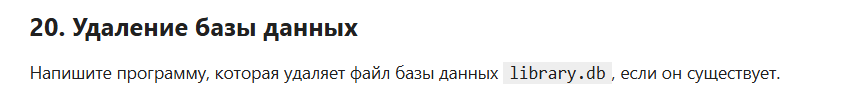

In [99]:
import os
if os.path.exists('library.db'):
    os.remove('library.db')
    print("Файл базы данных library.db удален")
else:
    print("Файл базы данных library.db не существует")

Файл базы данных library.db не существует


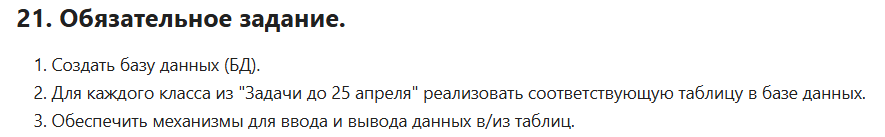

In [97]:
import sqlite3
if os.path.exists('boat_rental.db'):
    os.remove('boat_rental.db')
connection = sqlite3.connect('boat_rental.db')
cursor = connection.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS Boats (
    boat_id TEXT PRIMARY KEY,
    model TEXT NOT NULL,
    capacity INTEGER NOT NULL,
    hourly_rate REAL NOT NULL,
    is_available BOOLEAN NOT NULL
);
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Rowboats (
    boat_id TEXT PRIMARY KEY,
    number_of_oars INTEGER NOT NULL,
    FOREIGN KEY (boat_id) REFERENCES Boats(boat_id)
);
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Motorboats (
    boat_id TEXT PRIMARY KEY,
    engine_power INTEGER NOT NULL,
    FOREIGN KEY (boat_id) REFERENCES Boats(boat_id)
);
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Yachts (
    boat_id TEXT PRIMARY KEY,
    luxury_level INTEGER NOT NULL,
    FOREIGN KEY (boat_id) REFERENCES Boats(boat_id)
);
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Locations (
    city TEXT NOT NULL,
    address TEXT NOT NULL,
    PRIMARY KEY (city, address)
);
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Docks (
    dock_id TEXT PRIMARY KEY,
    location_city TEXT NOT NULL,
    location_address TEXT NOT NULL,
    capacity INTEGER NOT NULL,
    FOREIGN KEY (location_city, location_address) REFERENCES Locations(city, address)
);
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS DockBoats (
    dock_id TEXT NOT NULL,
    boat_id TEXT NOT NULL,
    PRIMARY KEY (dock_id, boat_id),
    FOREIGN KEY (dock_id) REFERENCES Docks(dock_id),
    FOREIGN KEY (boat_id) REFERENCES Boats(boat_id)
);
''')

##################################
cursor.execute('''
INSERT INTO Locations (city, address)
VALUES (?, ?);
''', ("Город", "Набережная"))

cursor.execute('''
INSERT INTO Docks (dock_id, location_city, location_address, capacity)
VALUES (?, ?, ?, ?);
''', ("D1", "Город", "Набережная", 5))

cursor.execute('''
INSERT INTO Boats (boat_id, model, capacity, hourly_rate, is_available)
VALUES (?, ?, ?, ?, ?);
''', ("R1", "Model 1", 2, 500, True))

cursor.execute('''
INSERT INTO Rowboats (boat_id, number_of_oars)
VALUES (?, ?);
''', ("R1", 2))

cursor.execute('''
INSERT INTO Boats (boat_id, model, capacity, hourly_rate, is_available)
VALUES (?, ?, ?, ?, ?);
''', ("M1", "Model 2", 4, 1500, True))

cursor.execute('''
INSERT INTO Motorboats (boat_id, engine_power)
VALUES (?, ?);
''', ("M1", 50))


cursor.execute('''
INSERT INTO DockBoats (dock_id, boat_id)
VALUES (?, ?);
''', ("D1", "R1"))

cursor.execute('''
INSERT INTO DockBoats (dock_id, boat_id)
VALUES (?, ?);
''', ("D1", "M1"))

connection.commit()
#Табблицы имеют одинаковые названия, так что обращаесмя с b.
cursor.execute('''
SELECT b.boat_id, b.model, b.capacity, b.hourly_rate, db.dock_id
FROM Boats b
JOIN DockBoats db ON b.boat_id = db.boat_id
WHERE b.is_available = 1 AND db.dock_id = ?;
''', ("D1",))

available_boats = cursor.fetchall()
for boat in available_boats:
    print(boat)

('M1', 'Model 2', 4, 1500.0, 'D1')
('R1', 'Model 1', 2, 500.0, 'D1')
